# Tarefa 9
Implementar um algoritmo genético para resolver um problema de minimização.

## Autores
Renan Mateus Bernardo Nascimento
<br/>Vinícius Magalhães D'Assunção

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

## Classe Cromossomo
Define o TAD de cromossomo, que possui como atributos uma lista de alelos e um valor de aptidão.

In [2]:
class Cromossomo:
    
    def __init__(self, qtd_alelos):
        self.alelos = np.zeros(qtd_alelos)
        self.aptidao = 0.0

## Classe Ag
Possui a implementação do algoritmo genético, possuindo os métodos para de população, cálculo de aptidão, seleção, cruzamento e mutação.

In [17]:
class Ag:

    def __init__(self, tam_populacao, inicio, fim, alfa_cruzamento, tax_cruzamento, tax_mutacao, max_geracoes):
        self.tam_populacao = tam_populacao
        # valor inicial para alelos do cromossomo
        self.inicio = inicio
        # Valor final para alelos do cromossomo
        self.fim = fim
        # Valor porcentagem do cromossomo que será utilizada dos pais no cruzamento
        self.alfa_cruzamento = alfa_cruzamento
        self.tax_cruzamento = tax_cruzamento
        self.tax_mutacao = tax_mutacao
        self.max_geracoes = max_geracoes
        # offset da função de aptidão
        self.OFFSET = 1500
        self.MAX = 959.6407 + self.OFFSET
        self.QTD_ALELOS = 2
        self.ELITE = 5
        self.populacao = []

    '''
    ' Inicializa a lista de população
    '''
    def popular(self):
        self.populacao = []
        for c in range(0, self.tam_populacao):
            cromo = Cromossomo(self.QTD_ALELOS)
            for a in range(0, len(cromo.alelos)):
                cromo.alelos[a] = random.randrange(self.inicio, self.fim + 1)
            cromo.aptidao = self.calcAptidao(cromo.alelos[0], cromo.alelos[1])
            self.populacao.append(cromo)

    '''
    ' Calcula a função de aptidão de toda a população
    '''
    def calcAptidao(self, x1, x2):
        return self.OFFSET + (x2 + 47) * np.sin(np.sqrt(abs(x2 + x1/2 +47))) + x1 * np.sin(np.sqrt(abs(x1 - (x2 + 47))))
        
    '''
    ' Faz a seleção da população utilizando o método da roleta
    ' @return selecao
    '''
    def selecionar(self):
        selecao = []
        roleta = {}
        total = 0
        
        # Adiciona índice do cromossomo à roleta
        for i, c in enumerate(self.populacao):
            # A roleta possui a tupla inicio_intervalo e fim_intervalo como índice do dicionário
            # O valor corresponde ao índice do vetor de população
            roleta[(total, total + c.aptidao)] = i
            total += c.aptidao
        
        # Sorteia tam_populacao/2 números para selecionar na roleta
        for i in range(0, self.tam_populacao):
            # Sorteia o número entre 0(fechado) e a aptidão total(aberto)
            num = random.uniform(0, total)0.6
            for intervalo, c in roleta.items():
                if num >= intervalo[0] and num < intervalo[1]:
                    selecao.append(c)
        return selecao
    
    '''
    ' Faz o cruzamento utilizando o método aritmético
    '''
    def cruzar(self, selecao):
        selecao = self.selecionar()
        filhos = []
        for i in range(0, int(len(selecao)/2)):
            (pai, pai2) = (self.populacao[selecao[2 * i]], self.populacao[selecao[2 * i + 1]])
            # Sorteia um número de 0 a 1 com duas casas decimais
            num = random.randrange(0, 100) / 100
            if num <= self.tax_cruzamento:
                # Se for menor que a taxa de cruzamento, faz o c/home/aluno/Downloadsruzamento aritmético
                qtd_alelos = len(pai.alelos)
                # Cria os cromossomos
                f1 = Cromossomo(qtd_alelos)
                f2 = Cromossomo(qtd_alelos)
                f1.alelos = self.alfa_cruzamento * pai.alelos + (1 - self.alfa_cruzamento) * pai2.alelos
                f2.alelos = (1 - self.alfa_cruzamento) * pai.alelos + self.alfa_cruzamento * pai2.alelos
                f1.aptidao = self.calcAptidao(f1.alelos[0], f1.alelos[1])
                f2.aptidao = self.calcAptidao(f2.alelos[0], f2.alelos[1])
                # Adiciona a lista de filhos
                filhos.append(f1)
                filhos.append(f2)
            else:
                # Senão apenas propaga os pais
                filhos.append(pai)
                filhos.append(pai2)
        return filhos
    
    '''
    ' Faz a mutação utilizando o método CREEP
    '''
    def mutar(self, filhos):
        n_casas = 1000 # Número de casas decimroundais para avaliar a mutação
        for cromo in filhos:
            for i in range(0, len(cromo.alelos)):
                # Sorteia um número de 0 a 1 com 3 casas decimais
                num = random.randrange(0, n_casas) / n_casas
                if num <= self.tax_mutacao:
                    delta = random.randrange(self.inicio, self.fim) / 10
                    cromo.alelos[i] += delta
    
    '''
    ' Substitui o pior filho pelo melhor pai
    '''
    def elitizar(self, filhos):
        # Ordena filhos por ordem decrescente de aptidão
        filhos = sorted(filhos, reverse=True, key = lambda Cromossomo: Cromossomo.aptidao)
        # Ordena pais por ordem decrescente de aptidão
        self.populacao = sorted(self.populacao,reverse=True, key = lambda Cromossomo: Cromossomo.aptidao)
        # Substitui os pelos filhos mantendo os ELITE melhores pais e tirando os ELITE piores filhos
        self.populacao = np.append(filhos[:-self.ELITE], self.populacao[:self.ELITE])
    
    
    '''
    ' Retorna mínimo, média e máximo
    '''
    def retornaMedidas(self):
        total_aptidao = 0
        minimo = self.populacao[0].aptidao
        maximo = self.populacao[0].aptidao
        for cromo in self.populacao:
            total_aptidao += cromo.aptidao
            if cromo.aptidao < minimo:
                minimo = cromo.aptidao
            elif cromo.aptidao > maximo:
                maximo = cromo.aptidao
        return minimo, total_aptidao / self.tam_populacao, maximo
    
    '''
    ' Gera o gráfico Erro x Iteração
    ''' 
    def gerarGrafico(self, tempo, minimo, media, maximo):
        plt.plot(tempo, minimo, label='Mínimo')
        plt.plot(tempo, media, label='Média')
        plt.plot(tempo, maximo, label='Máximo')
        plt.ylabel('Aptidão')
        plt.xlabel('Iteração')
        plt.title('Gráfico Aptidão x Iteração')
        plt.legend()
        plt.show()
        
    '''
    ' Executa max_geracoes vezes o algoritmo genético
    '''
    def executar(self, elitismo = False):
        self.popular()
        # Inicaliza os vetores de tempo e erro com o estado inicial
        mini, med, maxi = self.retornaMedidas()
        tempo = [0]
        minimo = [mini]
        media = [med]
        maximo = [maxi]
        t = 1
        # Executa o algoritmo genético até o erro ser zero ou atinger o máximo de gerações
        while t <= self.max_geracoes:
            selecao = self.selecionar()
            filhos = self.cruzar(selecao)
            self.mutar(filhos)
            if elitismo:
                self.elitizar(filhos)
            else:
                self.populacao = filhos
            mini, med, maxi = self.retornaMedidas()
            tempo.append(t)
            minimo.append(mini)
            media.append(med)
            maximo.append(maxi)
            t += 1
        # Gera o gráfico de saída
        self.gerarGrafico(tempo, minimo, media, maximo)

    def imprimirPopulacao(self):
        for c in self.populacao:
            print(str(c.alelos[0]) + '\t' + str(c.alelos[1]) + '\t' + str(c.aptidao))

## Variando a taxa de cruzamento

Taxa de cruzamento: 0.2


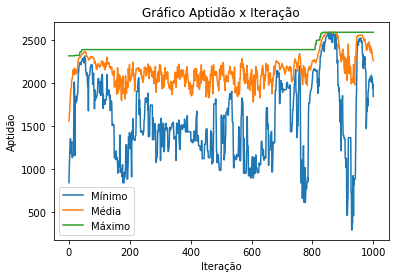

Taxa de cruzamento: 0.4


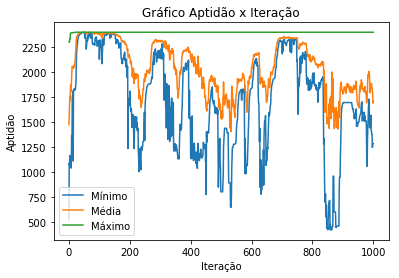

Taxa de cruzamento: 0.6


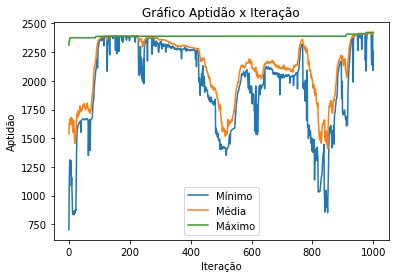

Taxa de cruzamento: 0.8


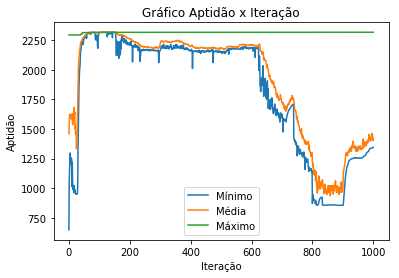

Taxa de cruzamento: 1.0


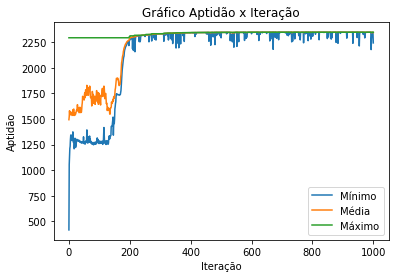

In [18]:
tam_populacao, inicio, fim, alfa, tax_cruzamento, tax_mutacao, max_geracoes = (100, -600, 600, 0.6, 0.6, 0.005, 1000)
elitismo = True

for i in range(1,6):
    tax_cruzamento = 2*i/10
    ag = Ag(tam_populacao, inicio, fim, alfa, tax_cruzamento, tax_mutacao, max_geracoes)
    print("Taxa de cruzamento: " + str(tax_cruzamento))
    ag.executar(elitismo)

## Variando a taxa de mutação

Taxa de mutação: 0.31623


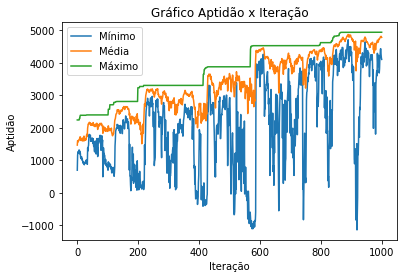

Taxa de mutação: 0.1


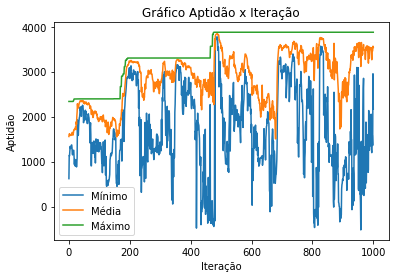

Taxa de mutação: 0.03162


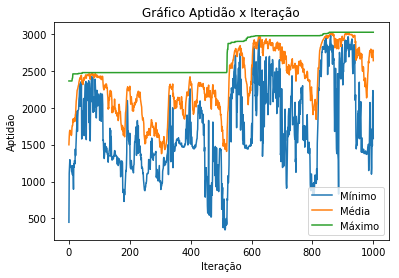

Taxa de mutação: 0.01


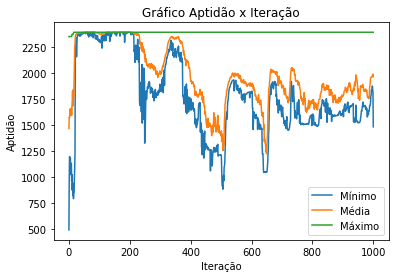

Taxa de mutação: 0.00316


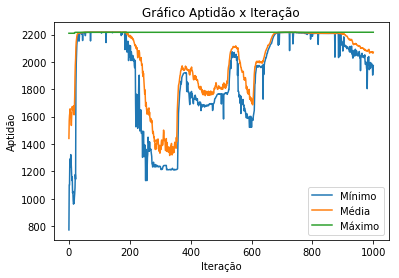

In [19]:
tam_populacao, inicio, fim, alfa, tax_cruzamento, tax_mutacao, max_geracoes = (100, -600, 600, 0.6, 0.6, 0.005, 1000)
elitismo = True

for i in range(1,6):
    tax_mutacao = round(1 / pow(10, i/2), 5)
    ag = Ag(tam_populacao, inicio, fim, alfa, tax_cruzamento, tax_mutacao, max_geracoes)
    print("Taxa de mutação: " + str(tax_mutacao))
    ag.executar(elitismo)

O sinal da função eggholder foi invertido e foi somado um OFFSET de 1500. Portanto, o máximo global passou a ser: 2459,6407.

Foram utilizados a aptidão como a avaliação, representação das variáveis em codificação real, cruzamento aritmético, mutação CREEP, seleção roleta.

## Variando o número de gerações

Máximo de gerações: 10


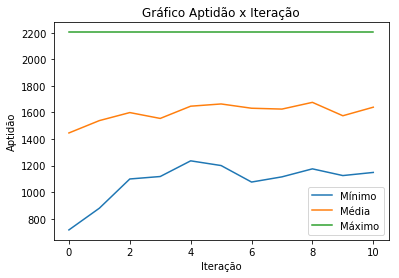

Máximo de gerações: 100


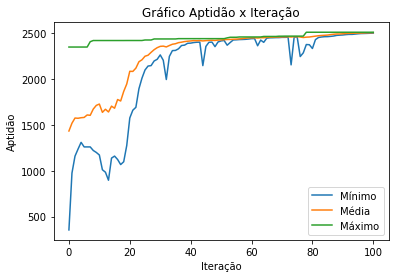

Máximo de gerações: 1000


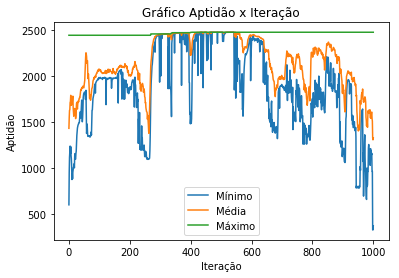

In [20]:
tam_populacao, inicio, fim, alfa, tax_cruzamento, tax_mutacao, max_geracoes = (100, -600, 600, 0.6, 0.6, 0.005, 1000)
elitismo = True

for i in range(1,4):
    max_geracoes = pow(10, i)
    ag = Ag(tam_populacao, inicio, fim, alfa, tax_cruzamento, tax_mutacao, max_geracoes)
    print("Máximo de gerações: " + str(max_geracoes))
    ag.executar(elitismo)

## Comparando com elitismo e sem elitismo

Com elitismo


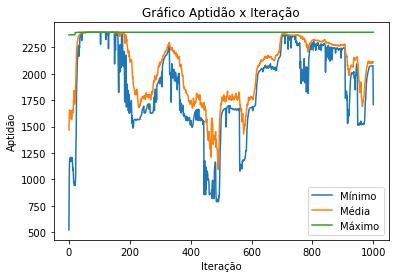

Sem elitismo


In [ ]:
tam_populacao, inicio, fim, alfa, tax_cruzamento, tax_mutacao, max_geracoes = (100, -600, 600, 0.6, 0.6, 0.01, 1000)
elitismo = True

print("Com elitismo")
ag.executar(elitismo)
print("Sem elitismo")
ag.executar(not elitismo)